# **Bitcoin**  

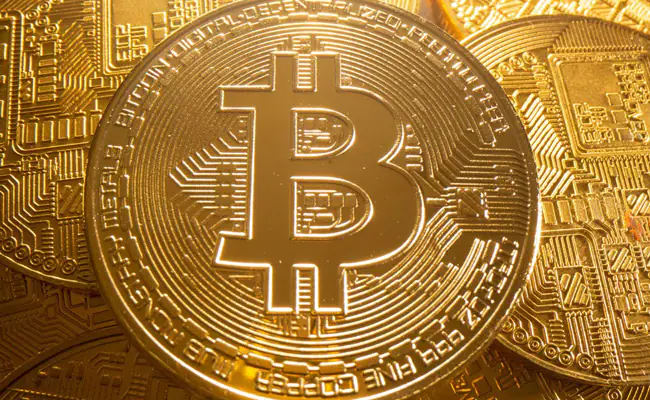

Bitcoin (₿) is a decentralized digital currency, without a central bank or single administrator, that can be sent from user to user on the peer-to-peer bitcoin network without the need for intermediaries. Transactions are verified by network nodes through cryptography and recorded in a public distributed ledger called a blockchain. The cryptocurrency was invented in 2008 by an unknown person or group of people using the name Satoshi Nakamoto.The currency began use in 2009 when its implementation was released as open-source software.(Source: Wikipedia)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Libraries for Data Manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt #For datetime

#Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing Dataset**

In [ ]:
#Importing Dataset 
crypto_data=pd.read_csv("../input/g-research-crypto-forecasting/train.csv")
crypto_data.head(10)

# Filtering Bitcoin from the dataset

In [ ]:
#Filtering the dataset into different assets
bitcoin=crypto_data.query('Asset_ID==1')
bitcoin.head()

**Checking for Null Values**

In [ ]:
#Checking columns with missing data
bitcoin.isnull().sum()

**Dropping Null Values**

In [ ]:
#Dropping Null Values and assest id as it is irrelevant
bitcoin=bitcoin.dropna()
bitcoin=bitcoin.drop(columns=['Asset_ID'])

**Changing Unix timestamp into Date and Time**

In [ ]:
#Changing timestamp into date
bitcoin['timestamp'] = pd.to_datetime(bitcoin['timestamp'],unit='s')
bitcoin.head()

# Explanatory Data Analysis

**Statistics of Bitcoin**

In [ ]:
bitcoin.describe().T

**Some Insights about Bitcoin**

In [ ]:
print("All Time High Price:",max(bitcoin['High']))
print("Highest Number of Bitcoin units traded during the minute:",max(bitcoin['Volume']))
print("The Highest Number of trades that took place:",max(bitcoin['Count']))

**VWAP as per Time**

In [ ]:
#Plotting VWAP values of Bitcoin
plt.figure(figsize=(16,8))
plt.fill_between(bitcoin['timestamp'], bitcoin['VWAP'])
plt.show()

**Trading Volume as per Time**

In [ ]:
#Plotting Trading Volume of Bitcoin
plt.figure(figsize=(16,8))
plt.plot(bitcoin['timestamp'], bitcoin['Volume'])

**The Number of Trades that took place as per Time**

In [ ]:
#Plotting The number of trades that took place this minute.
plt.figure(figsize=(16,8))
plt.plot(bitcoin['timestamp'], bitcoin['Count'])

**Correlation**

In [ ]:
#Calculating Correlation
corr=bitcoin.corr()

#Plotting Correlation
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="GnBu")

# Using **PyCaret** for Forcasting Close price of Bitcoin

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.

The time series module is still in beta. The development team is adding new functionalities every day and doing weekly pip releases. Please ensure to create a separate python environment to avoid dependency conflicts with the main pycaret. The final release of this module will be merged with the main pycaret in the next major release.

**[Website](https://pycaret.org/)** **[Github](https://github.com/pycaret/pycaret)** **[LinkedIn](https://www.linkedin.com/company/pycaret/)**

In [ ]:
#creating new data for forcasting  with timestamp and closing price
close_price= bitcoin[['timestamp', 'Close']].copy()
close_price=close_price.set_index('timestamp')

close_price = close_price.groupby('timestamp').sum()
close_price = close_price.asfreq('D')
close_price.head()

In [ ]:
#Plotting the chart
close_price.plot()

**Installing Pycaret**

In [ ]:
!pip install pycaret-ts-alpha -U

**Setting up the model and comapring between different models**

In [ ]:
#Setting up for comparing the best model to use with the data.
from pycaret.time_series import *
exp_name = setup(data = close_price,  fh = 12)
best_model = compare_models()  # Note that we provided seasonal_period manually for annual data

**Plotting the best model**

In [ ]:
plot_model(best_model, plot = 'insample')

In [ ]:
plot_model(estimator = best_model, plot = 'forecast', data_kwargs = {'fh' : 100})

> **Thank you for Visiting, Please upvote if you liked this Notebook.**